In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,20)

In [34]:
def plot(path):
    data = pd.read_csv(path, names=['type', 'n', 'comparisons', 'swaps', 'time'])
    
    data['c/n'] = data.apply(lambda row: row['comparisons']/row['n'], axis=1)
    data['s/n'] = data.apply(lambda row: row['swaps']/row['n'], axis=1)
    
    for i, key in enumerate(data.keys()[2:]):
        types =  data['type'].unique()
        plot_all  = None
        plot_noselect = None
        plot_detailed = None
        for t in types:
            df = data[data['type'] == t][['n', key]].groupby('n').mean()
            if t != 'select':
                plot_noselect = df.plot(ax=plot_noselect)
                if t != 'insert':
                    plot_detailed = df.plot(ax=plot_detailed)
            plot_all = df.plot(ax=plot_all)

        plot_all.legend(labels=list(types))
        plot_all.set_title(key)
        plot_noselect.legend(labels=list(types)[1:])
        plot_noselect.set_title(key+" without select")
        plot_detailed.legend(labels=list(types)[2:])
        plot_detailed.set_title(key + " without slow sorts")

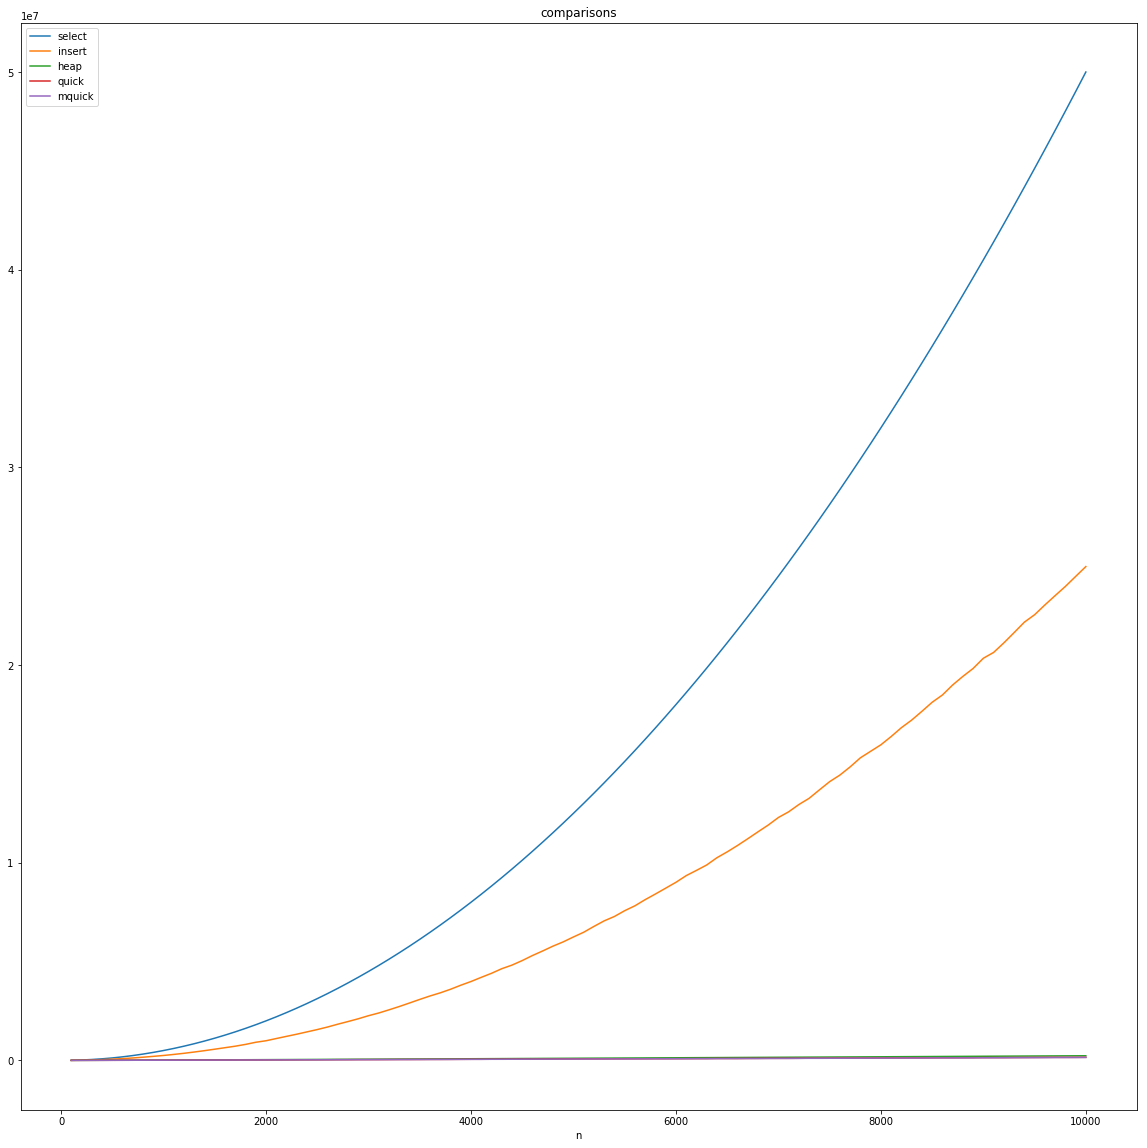

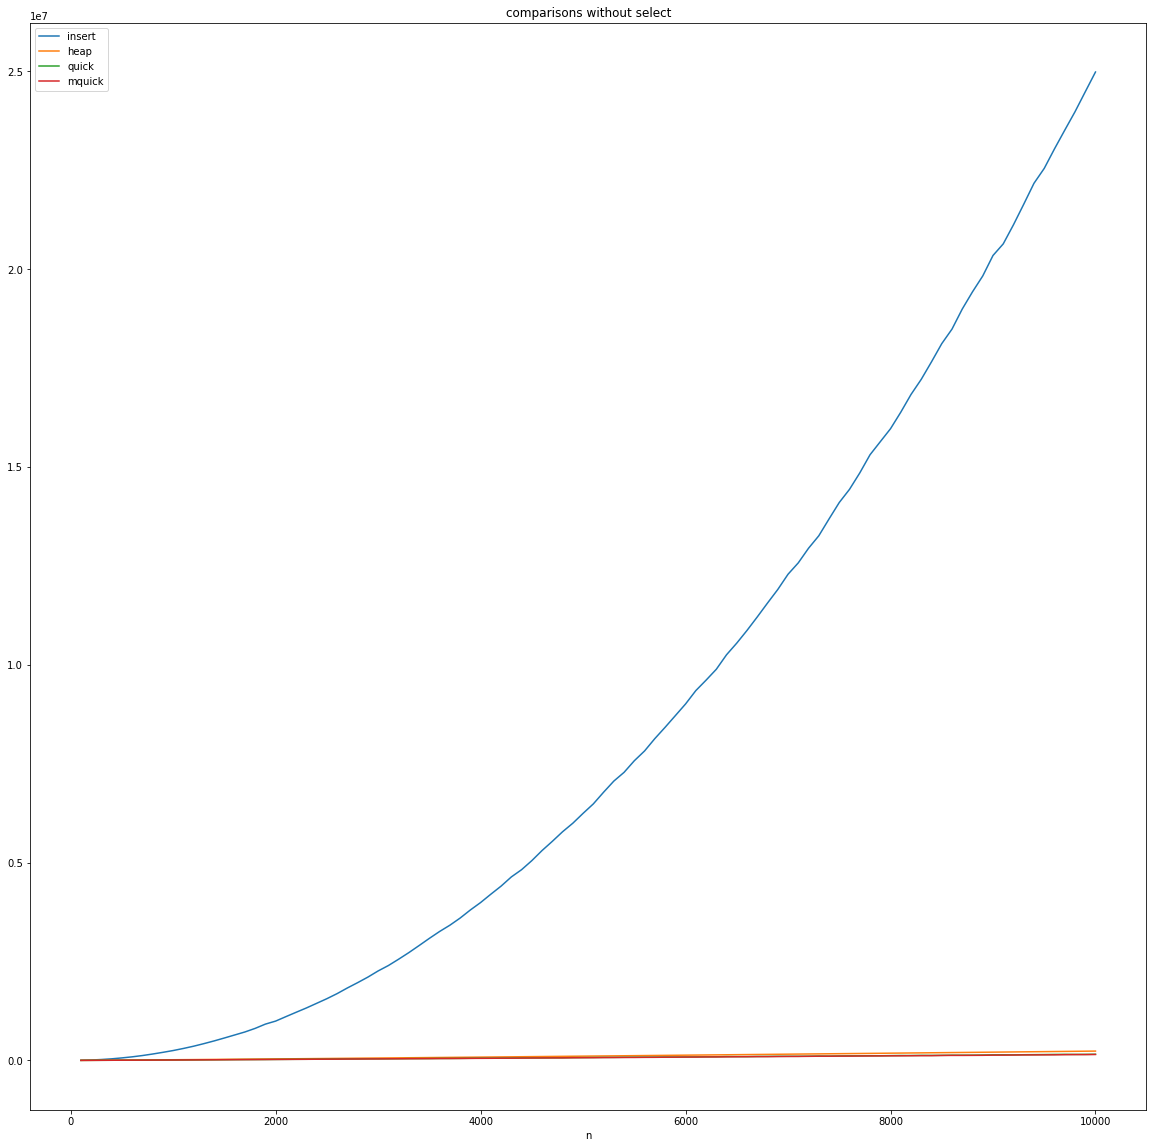

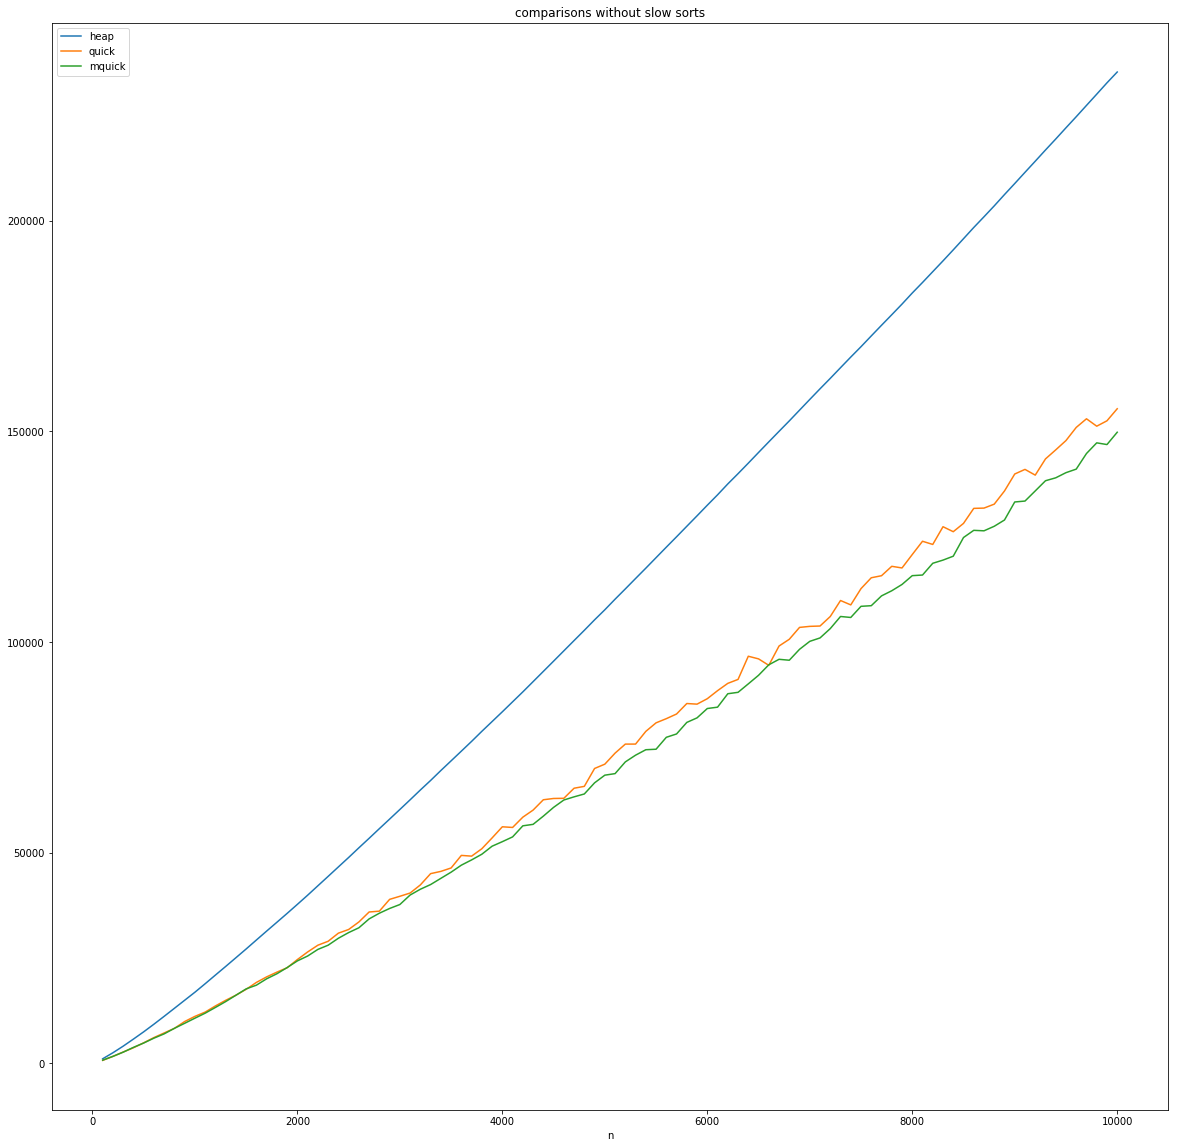

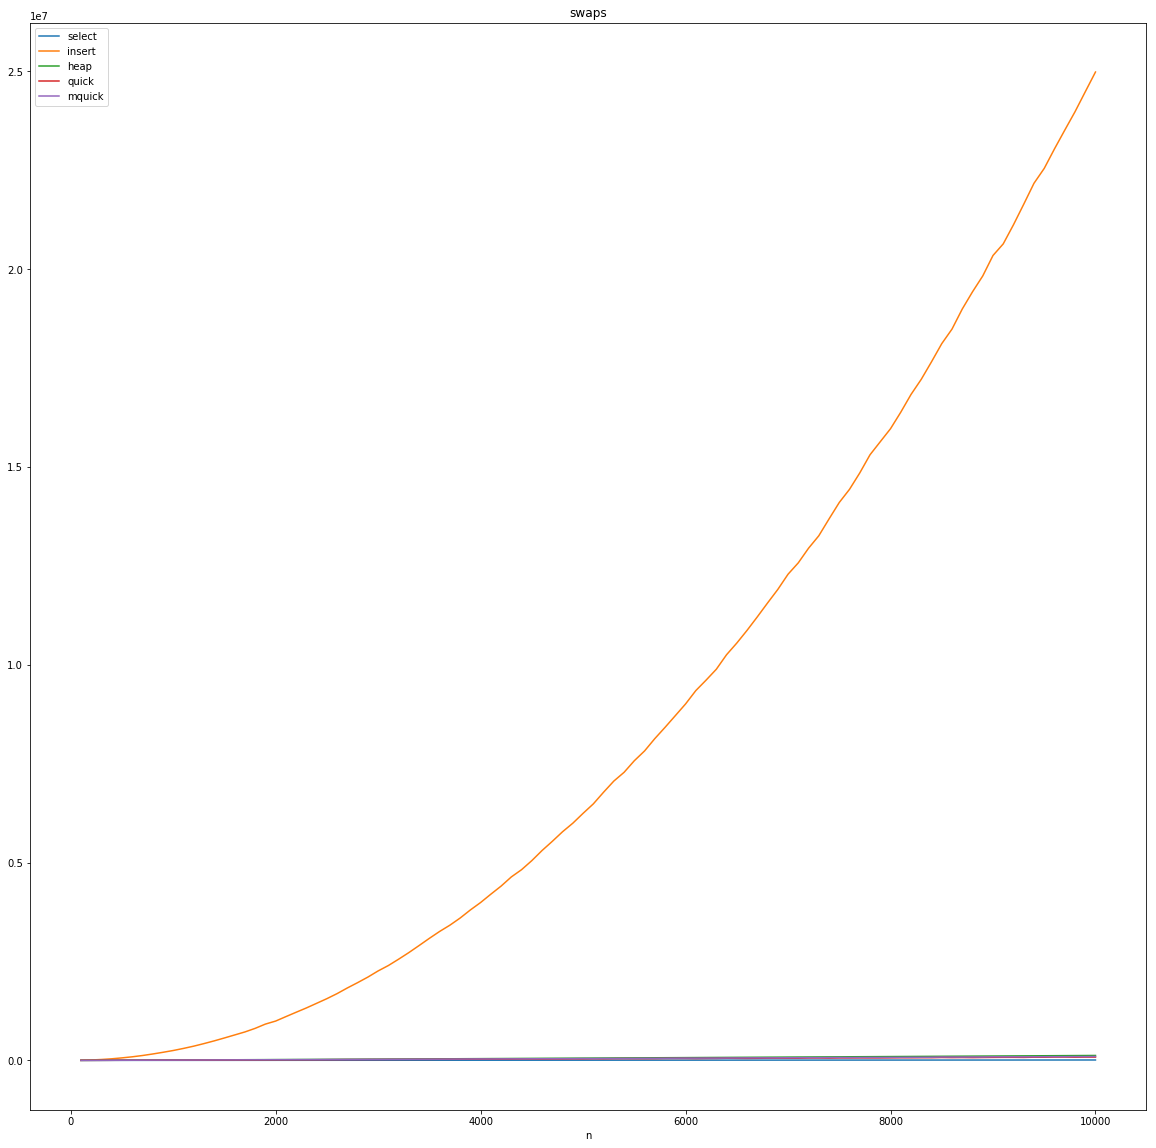

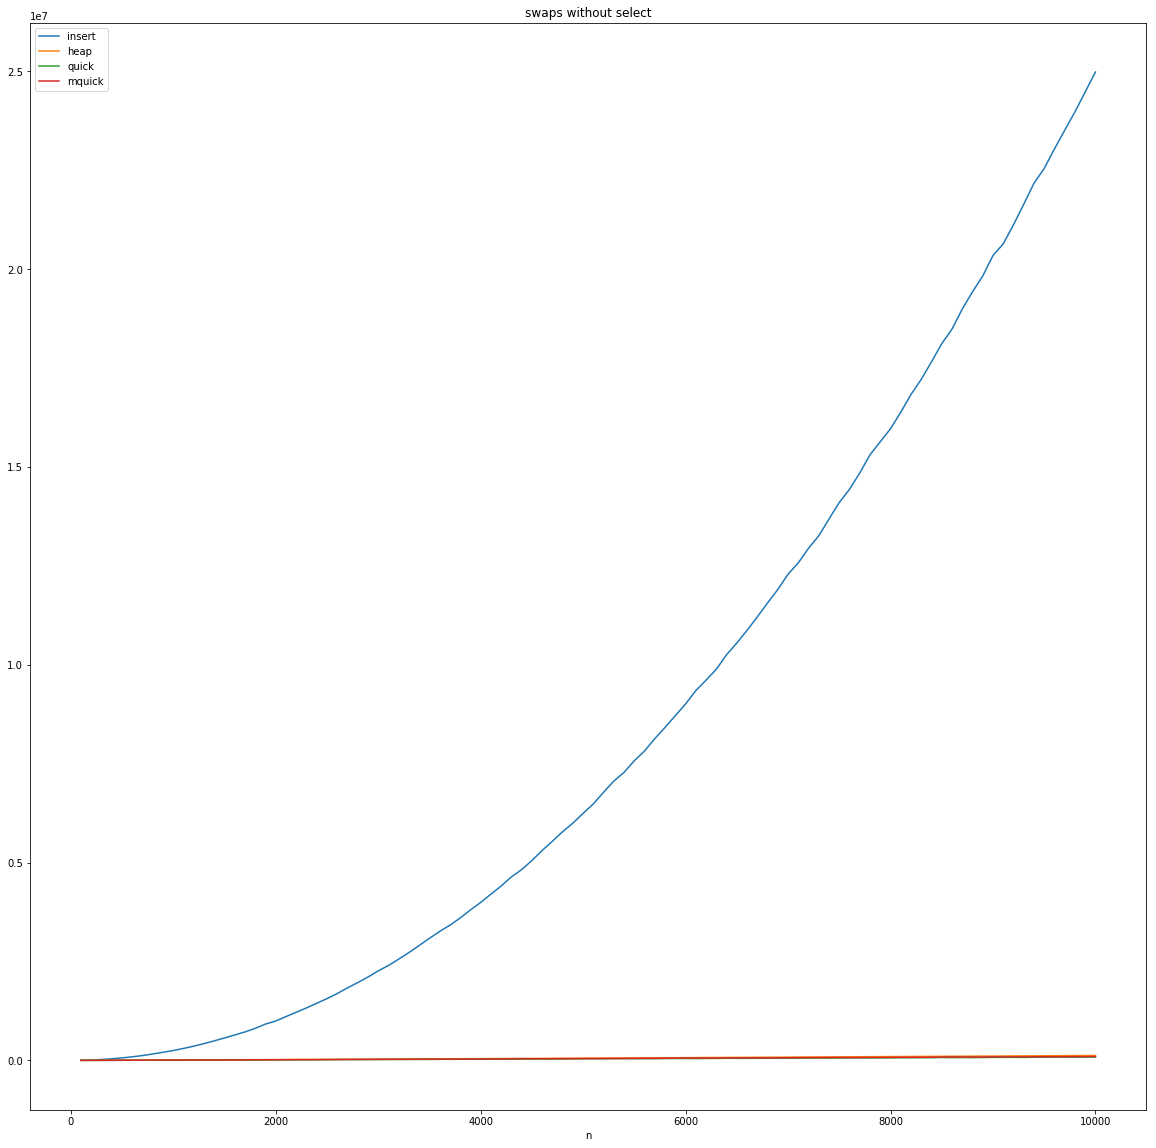

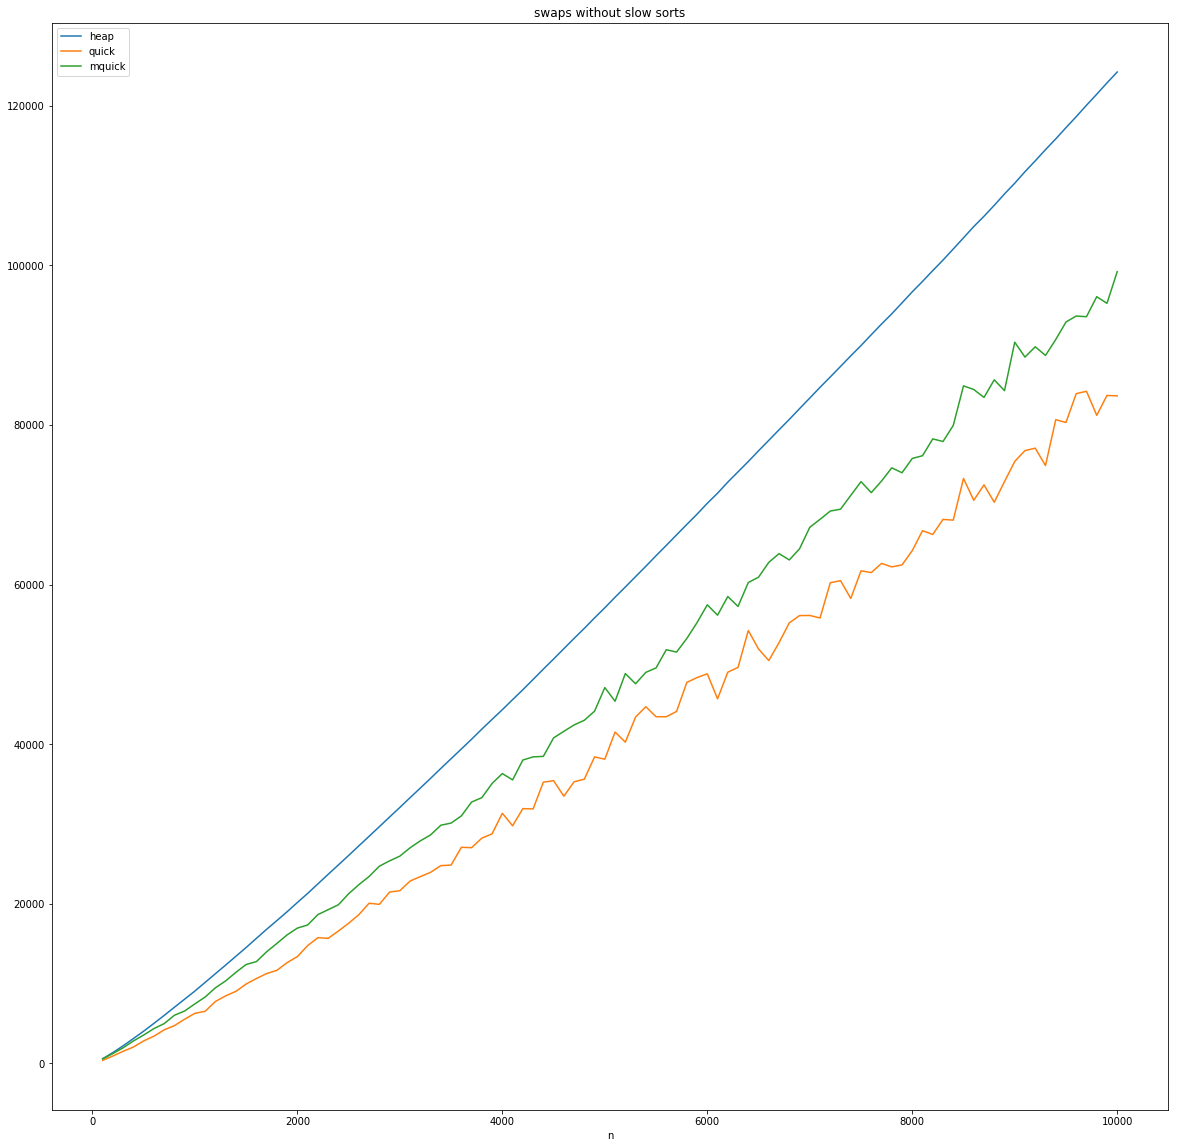

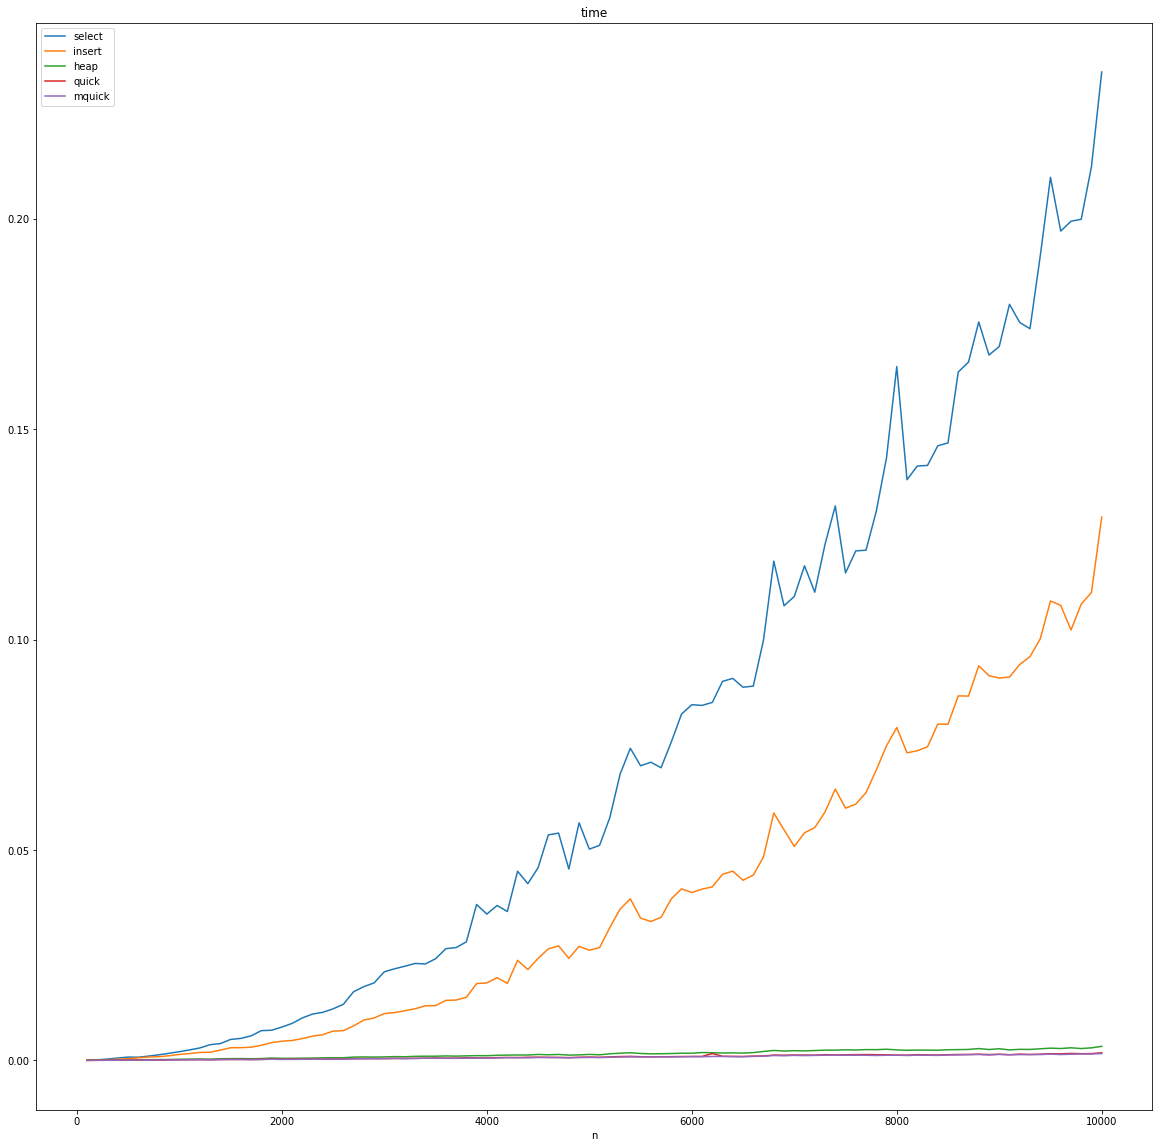

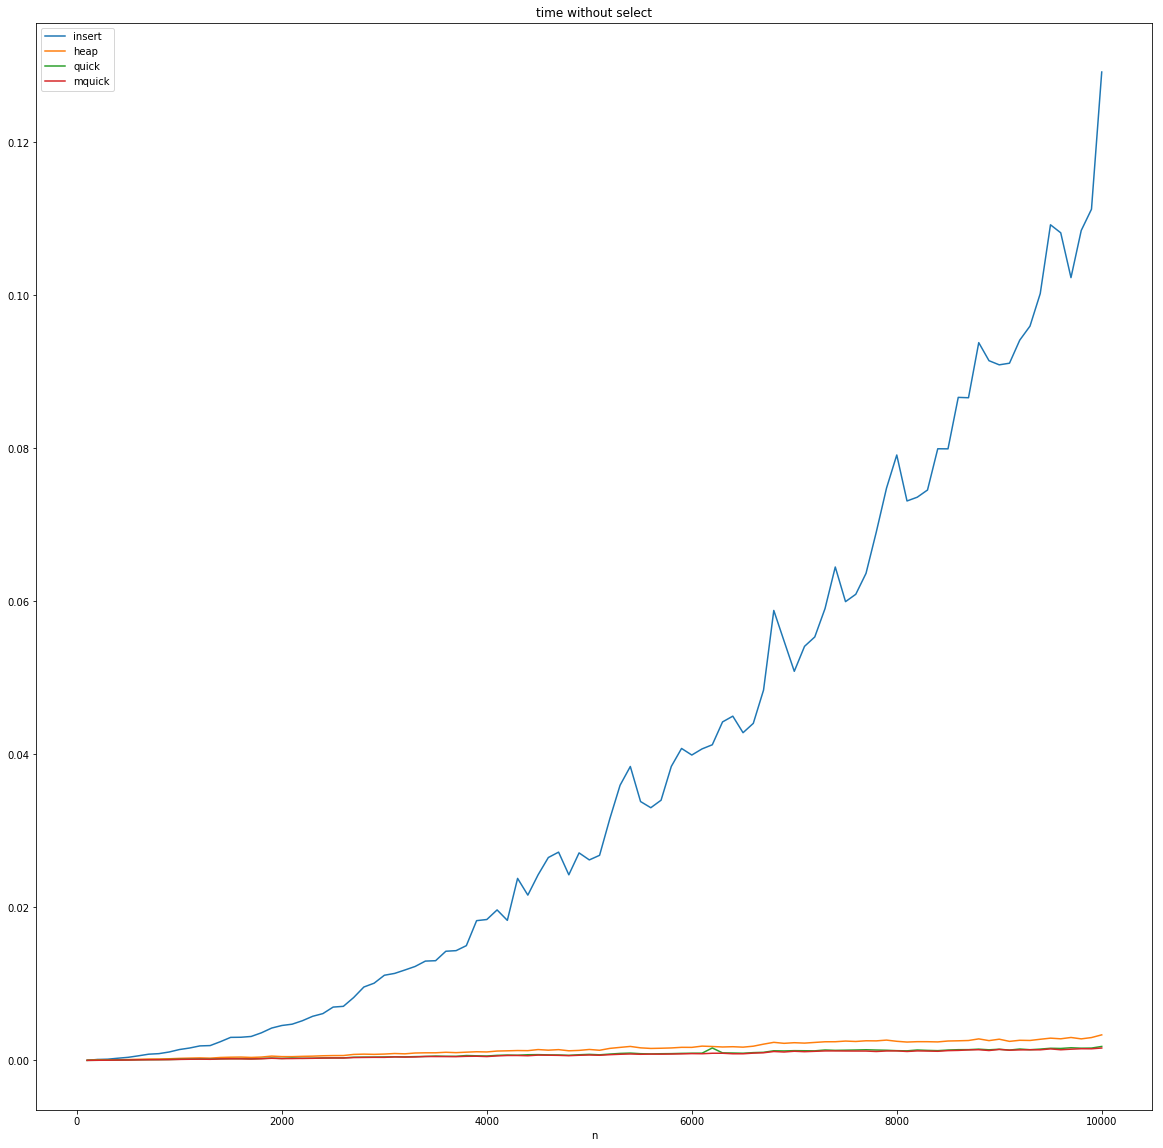

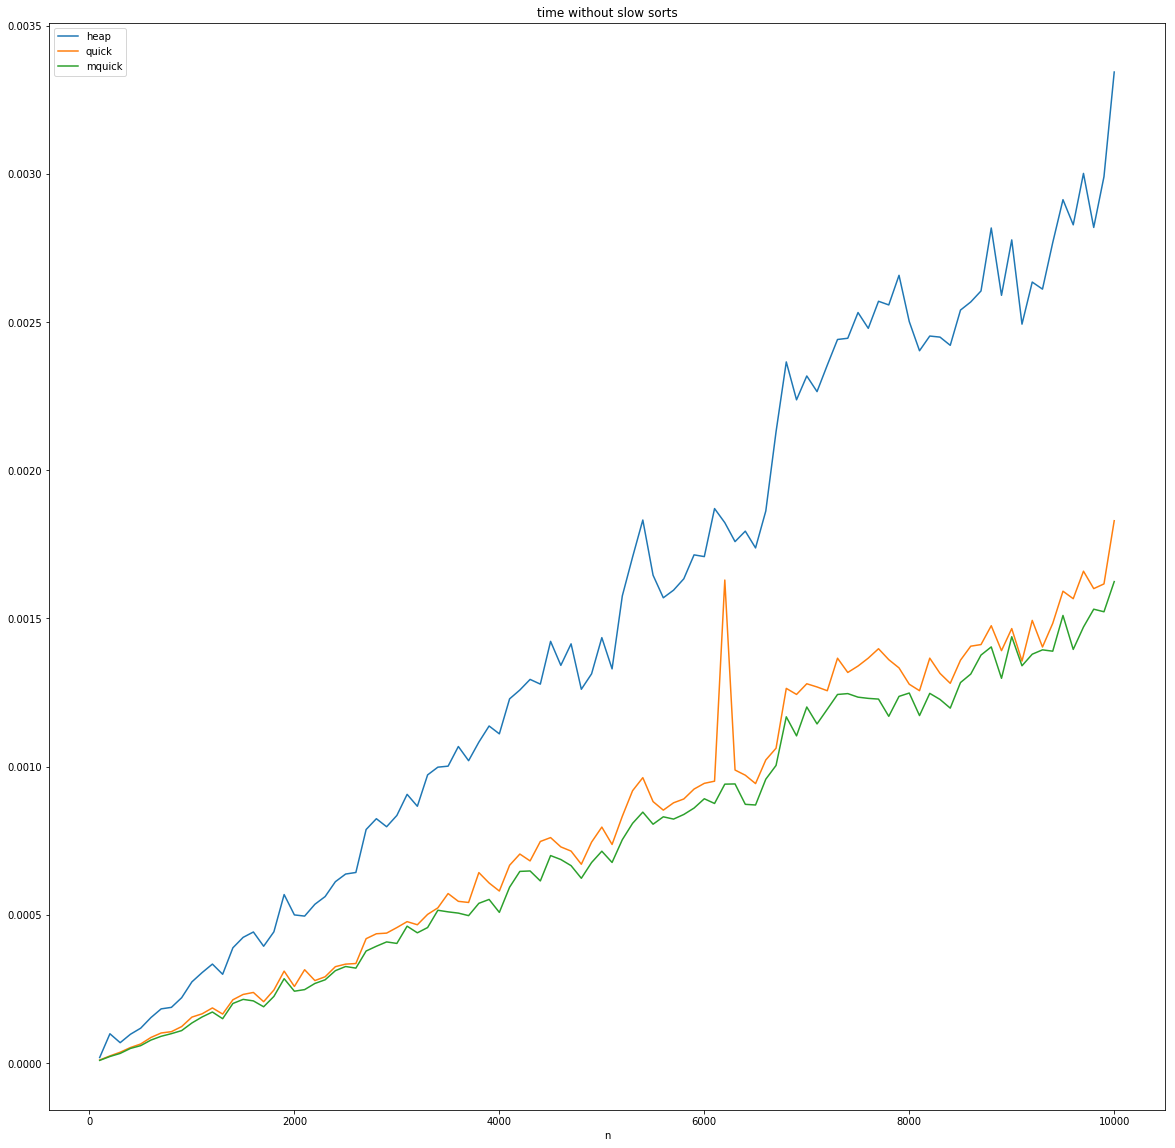

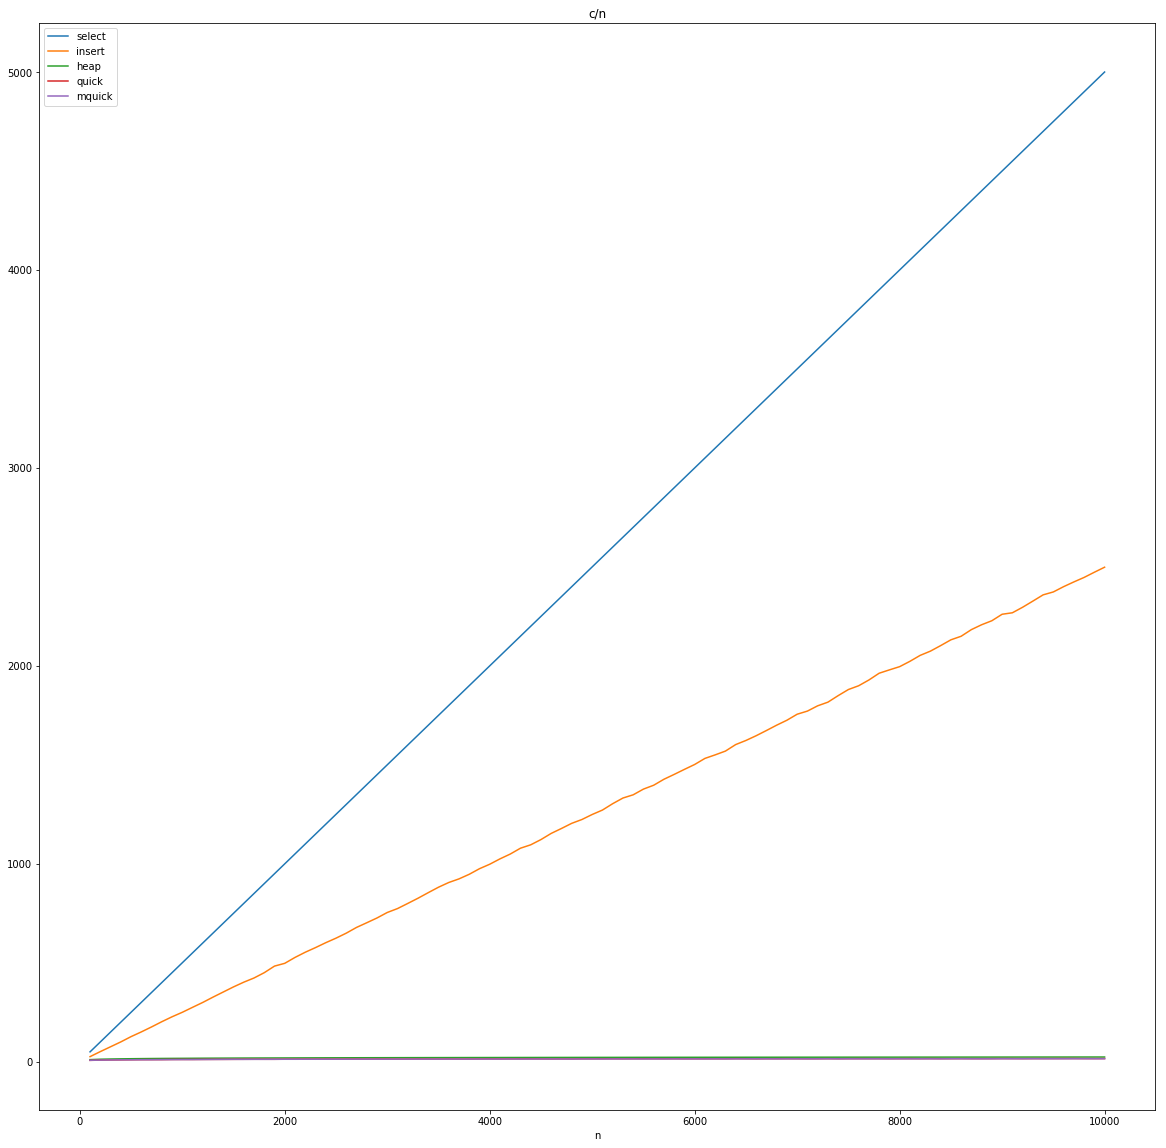

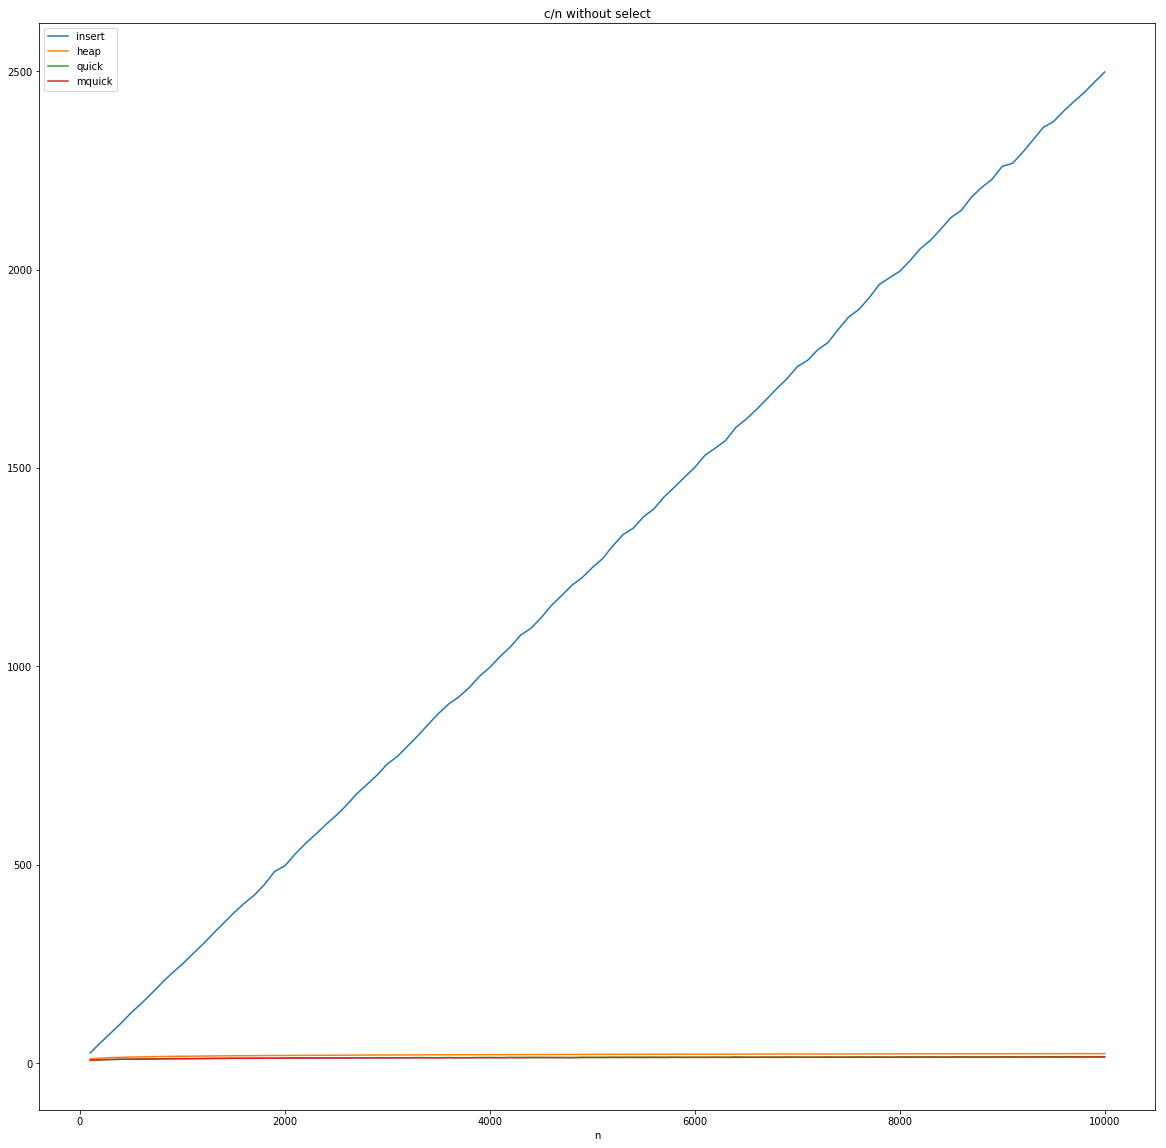

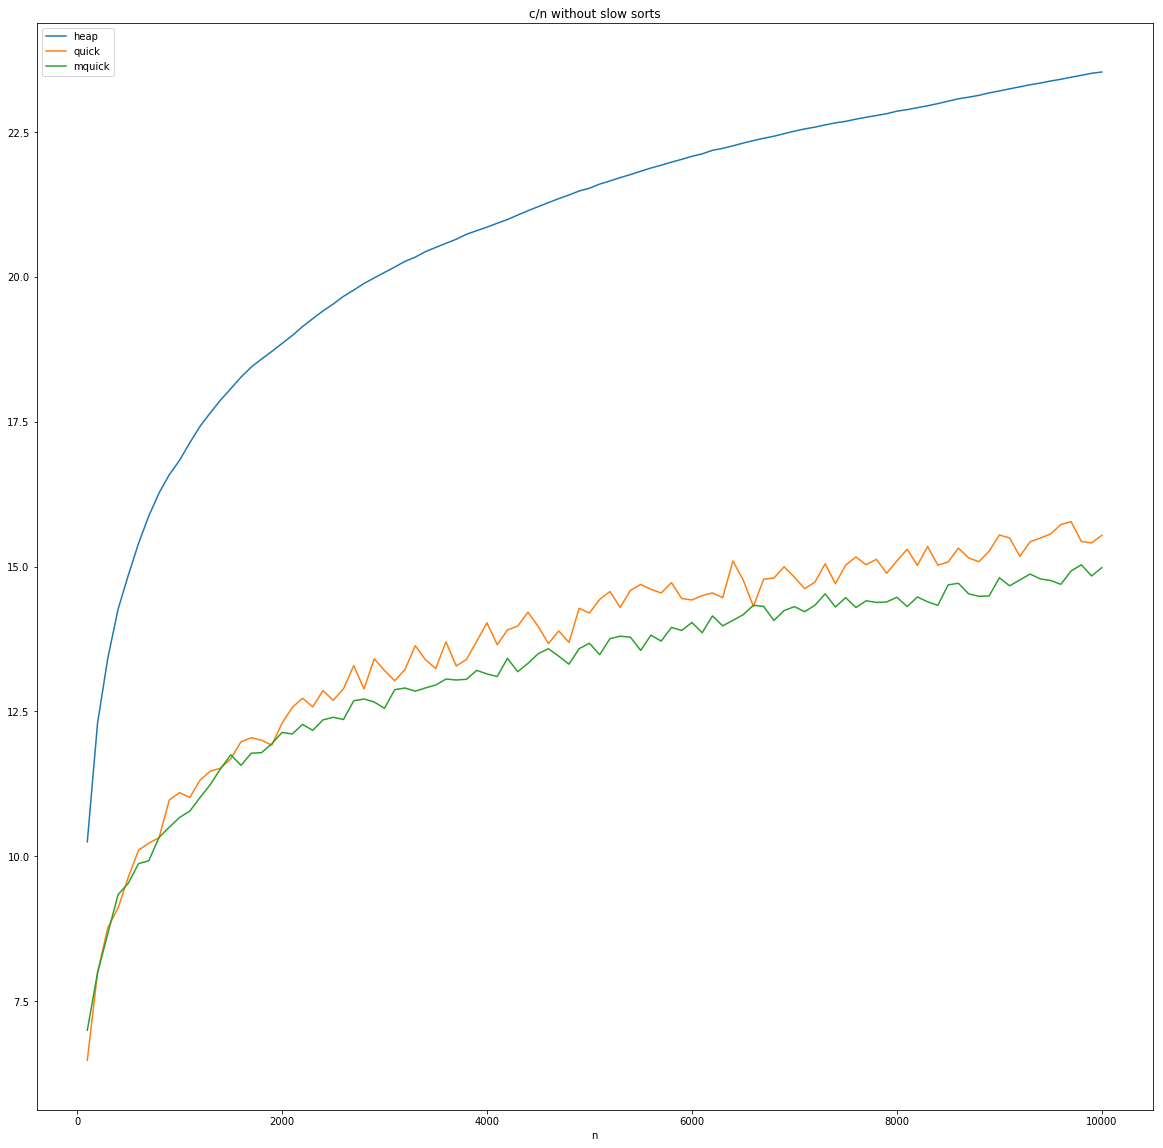

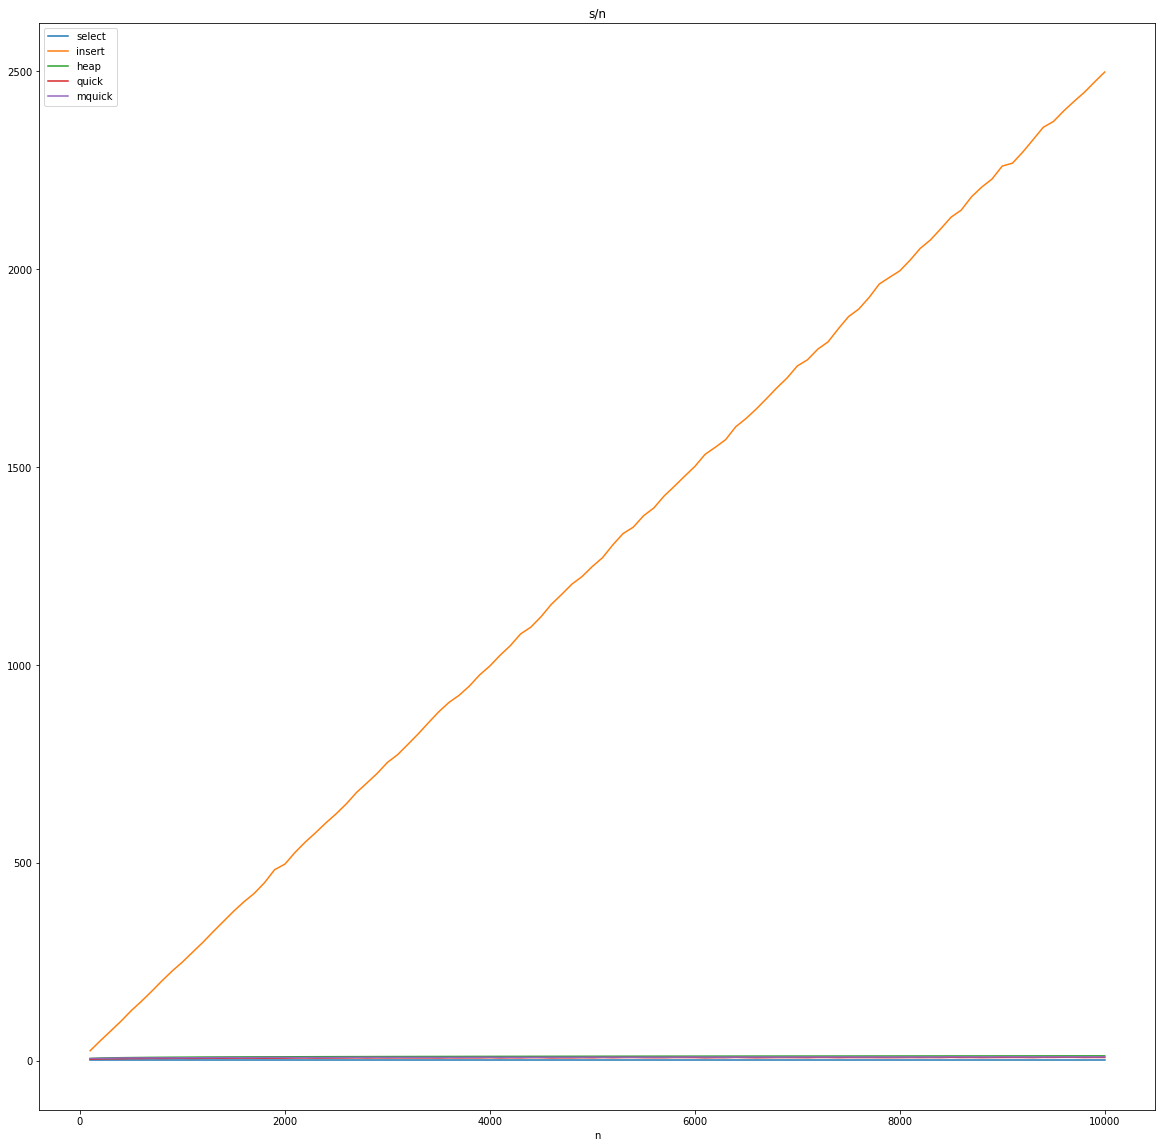

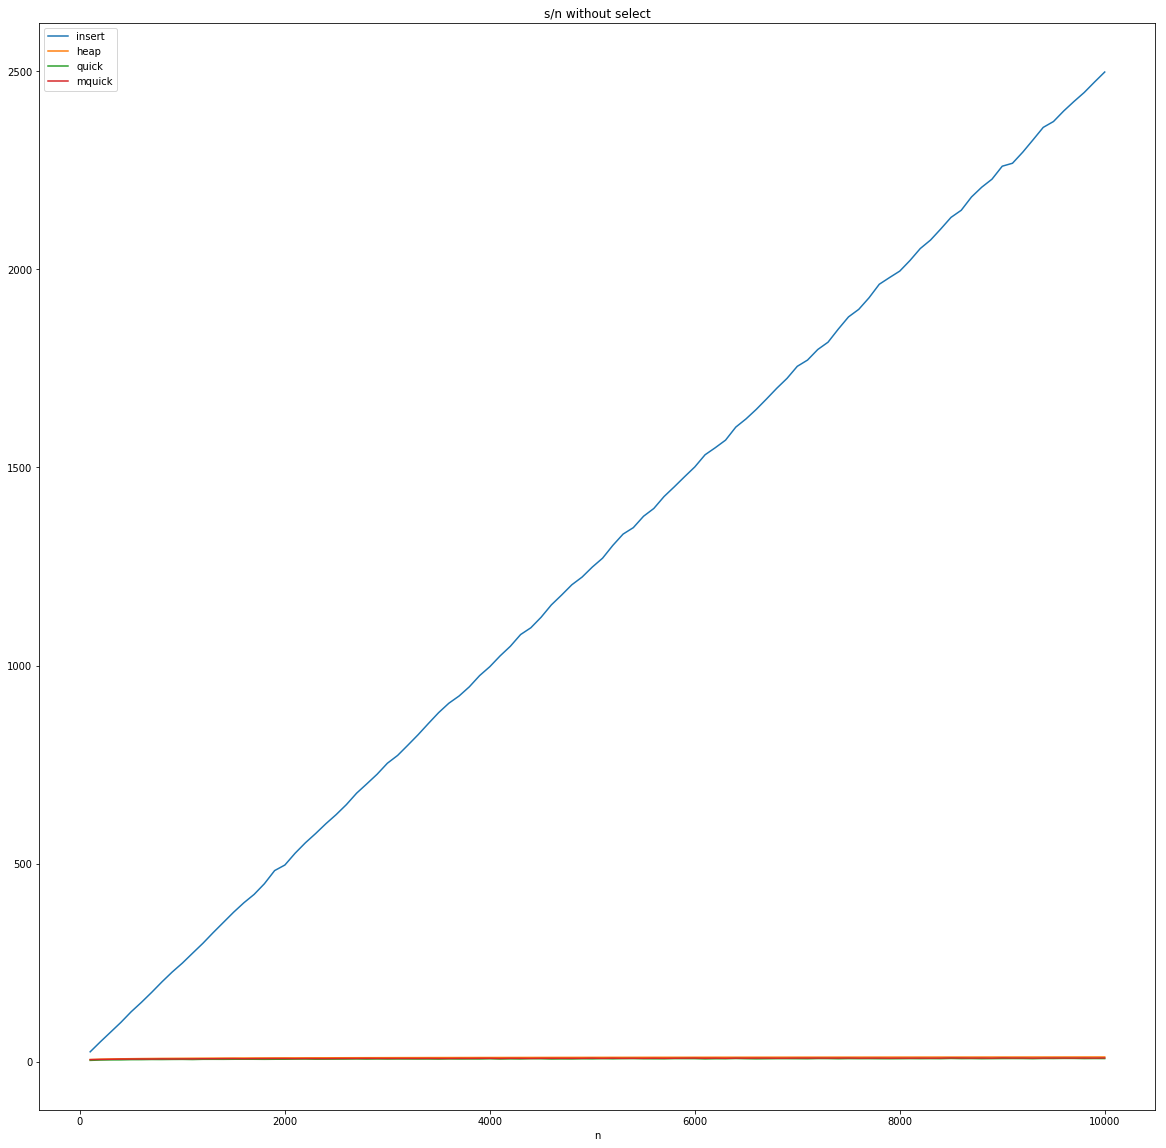

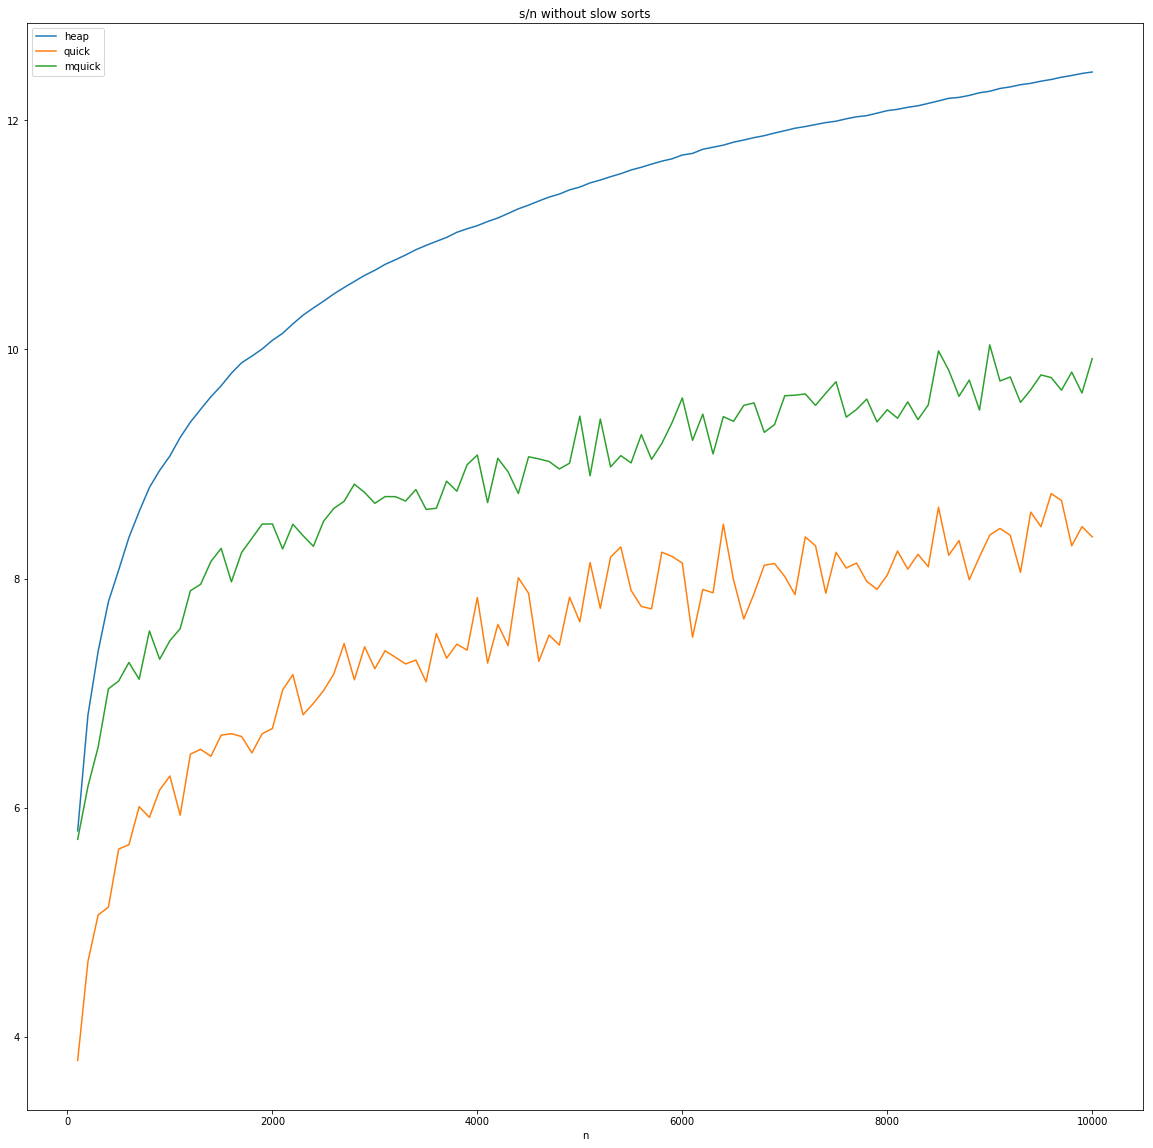

In [35]:
plot('../stats10.csv')